In [2]:
import numpy as np
import pandas as pd
import os 
import sys
sys.path.append(os.path.abspath('../common')) # add path to common functions

In [3]:
from preprocess import getdfs

train_df, valid_df = getdfs(data = 'text_seq', train_size = 1)

In [5]:
train_df.head()

,input_str,label
0,0000154364642718159661428002624223132284159626...,0
1,0004641596369515436422262614110471596262476161...,0
2,0001543626215965999614422464135806142624051159...,0
3,0000154364224641238614262159689561596284351061...,1
4,0004641899422154362069015966142624761262159661...,1


In [19]:
train_df['input_str'] = train_df['input_str'].apply(lambda x : x[3:])
valid_df['input_str'] = valid_df['input_str'].apply(lambda x : x[3:])

In [20]:
train_df.head()

,input_str,label
0,01543646427181596614280026242231322841596262614,0
1,46415963695154364222626141104715962624761614284,0
2,15436262159659996144224641358061426240511596284,0
3,01543642246412386142621596895615962843510614262,1
4,46418994221543620690159661426247612621596614284,1


In [21]:
num_feat = 47

def get_columns (df) :
    for i in range(num_feat):
        df[f'c_{i}'] = df['input_str'].apply(lambda x : x[i])
    return df.drop(columns = ['input_str'])

train_df = get_columns(train_df)
valid_df = get_columns(valid_df)

In [23]:
train_df.head()

,label,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,...,c_37,c_38,c_39,c_40,c_41,c_42,c_43,c_44,c_45,c_46
0,0,0,1,5,4,3,6,4,6,4,...,1,5,9,6,2,6,2,6,1,4
1,0,4,6,4,1,5,9,6,3,6,...,4,7,6,1,6,1,4,2,8,4
2,0,1,5,4,3,6,2,6,2,1,...,0,5,1,1,5,9,6,2,8,4
3,1,0,1,5,4,3,6,4,2,2,...,3,5,1,0,6,1,4,2,6,2
4,1,4,6,4,1,8,9,9,4,2,...,1,5,9,6,6,1,4,2,8,4


In [11]:
x_train = train_df.drop(columns = ['label']).values
y_train = train_df['label'].values

x_valid = valid_df.drop(columns = ['label']).values
y_valid = valid_df['label'].values

In [12]:
from models import predict_random_forest, predict_xgboost, predict_mlp, predict_logistic_regression, predict_svc
from evaluate import evaluate_predictions

==========Random Forest==========
              precision    recall  f1-score   support

     Class 0       0.62      0.69      0.66       252
     Class 1       0.63      0.55      0.59       237

    accuracy                           0.63       489
   macro avg       0.63      0.62      0.62       489
weighted avg       0.63      0.63      0.62       489

Accuracy is 0.6257668711656442
==========Random Forest==========


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:02:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


==========XGBoost==========
              precision    recall  f1-score   support

     Class 0       0.67      0.69      0.68       252
     Class 1       0.66      0.63      0.64       237

    accuracy                           0.66       489
   macro avg       0.66      0.66      0.66       489
weighted avg       0.66      0.66      0.66       489

Accuracy is 0.6605316973415133
==========XGBoost==========
==========Logistic Regression==========
              precision    recall  f1-score   support

     Class 0       0.55      0.61      0.58       252
     Class 1       0.53      0.47      0.50       237

    accuracy                           0.54       489
   macro avg       0.54      0.54      0.54       489
weighted avg       0.54      0.54      0.54       489

Accuracy is 0.5419222903885481
==========Logistic Regression==========
==========MLP==========
              precision    recall  f1-score   support

     Class 0       0.54      0.58      0.56       252
     Class 1   

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


==========SVC==========
              precision    recall  f1-score   support

     Class 0       0.57      0.72      0.63       252
     Class 1       0.58      0.41      0.48       237

    accuracy                           0.57       489
   macro avg       0.57      0.57      0.56       489
weighted avg       0.57      0.57      0.56       489

Accuracy is 0.5705521472392638
==========SVC==========


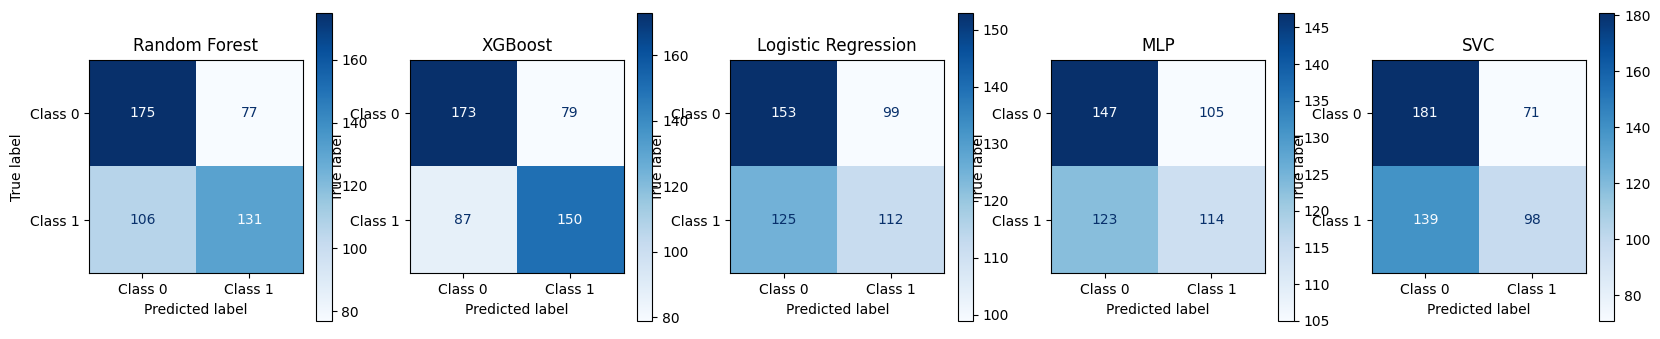

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns grid

y_pred_rf = predict_random_forest(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_rf, 'Random Forest', ax=axes[0])

y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_xgb, 'XGBoost', ax=axes[1])

y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_lr, 'Logistic Regression', ax=axes[2])

y_pred_mlp = predict_mlp(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP', ax = axes[3])

y_pred_svc = predict_svc(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_svc, 'SVC', ax = axes[4])

plt.tight_layout()
plt.show()